In [1]:
import os
import shutil

In [26]:
dataset_dir = '/Users/jinilcs/mywork/machine_learning/books/deeplearning_with_python/data/train'

In [19]:
base_dir = '/Users/jinilcs/mywork/machine_learning/books/deeplearning_with_python/data_small'

os.makedirs(base_dir, exist_ok=True)

In [20]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [21]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.makedirs(train_cats_dir, exist_ok=True)
os.makedirs(train_dogs_dir, exist_ok=True)
os.makedirs(validation_cats_dir, exist_ok=True)
os.makedirs(validation_dogs_dir, exist_ok=True)
os.makedirs(test_cats_dir, exist_ok=True)
os.makedirs(test_dogs_dir, exist_ok=True)

In [33]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dest)

In [34]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dest)

In [35]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dest)

In [36]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dest)

In [37]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dest)

In [38]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dest)

In [40]:
len(os.listdir(train_cats_dir))

1000

In [41]:
len(os.listdir(train_dogs_dir))

1000

In [42]:
len(os.listdir(validation_cats_dir))

500

In [43]:
len(os.listdir(validation_dogs_dir))

500

In [44]:
len(os.listdir(test_cats_dir))

500

In [45]:
len(os.listdir(test_dogs_dir))

500

### Data Preprocessing

In [58]:
from keras.preprocessing.image import ImageDataGenerator

In [59]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [60]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary'
                                                   )

Found 2000 images belonging to 2 classes.


In [61]:
validation_generator = train_datagen.flow_from_directory(validation_dir, 
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary'
                                                   )

Found 1000 images belonging to 2 classes.


### Create the model

In [2]:
from keras import layers
from keras import models

from keras import optimizers

In [54]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [57]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), 
              loss='binary_crossentropy', metrics=['acc'])

### Train the model

In [62]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 86s 864ms/step - loss: 0.6870 - acc: 0.5460 - val_loss: 0.6607 - val_acc: 0.6070
Epoch 2/30
100/100 [==============================] - 88s 877ms/step - loss: 0.6502 - acc: 0.6130 - val_loss: 0.6410 - val_acc: 0.6160
Epoch 3/30
  5/100 [>.............................] - ETA: 1:11 - loss: 0.6300 - acc: 0.6400

KeyboardInterrupt: 

In [147]:
model.save('cats_and_dogs_small_1.h5')

### Data augmentation

In [63]:
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

In [87]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [65]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [129]:
img_path = fnames[0]

In [130]:
img_path

'/Users/jinilcs/mywork/machine_learning/books/deeplearning_with_python/data_small/train/cats/cat.952.jpg'

In [131]:
img = image.load_img(img_path, target_size=(150,150))

In [132]:
x = image.img_to_array(img)

In [133]:
x.shape

(150, 150, 3)

In [134]:
x = x.reshape((1,)+x.shape)

In [135]:
x.shape

(1, 150, 150, 3)

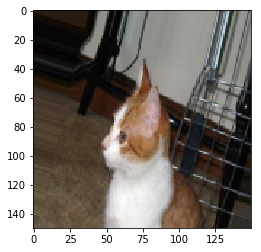

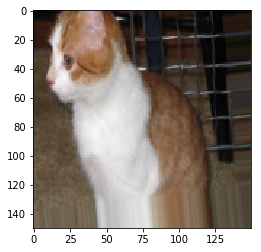

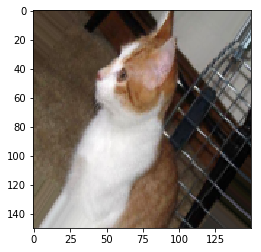

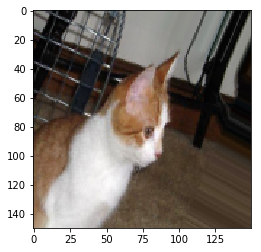

In [136]:
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 ==0:
        break
plt.show()

### New convnet with dropout

In [137]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [140]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics = ['acc'])

In [143]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [144]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [145]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150,150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150,150), 
                                                        batch_size=32, 
                                                        class_mode='binary')

In [146]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                             epochs=100, validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
 24/100 [======>.......................] - ETA: 1:32 - loss: 0.6934 - acc: 0.5208

KeyboardInterrupt: 

In [148]:
model.save('cats_and_dogs_small_2.h5')

### Using pretrained model

In [3]:
from keras.applications import VGG16

In [4]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

58892288/58889256 [==============================] - 9s 0us/step


In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________